<a href="https://colab.research.google.com/github/yankaique/data_analysis_imdb/blob/main/imdb_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture

!gdown --id 1PuBVrIh2UJcq10RDqWvLWrYd7O7CEbzW

In [2]:
import pandas as pd

Referência: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

# Desafio

- Qual é nota média dos votos do IMDB?
- Quantos filmes foram produzidos entre 2005 e 2010 (inclusos)?
- Quais são os 5 filmes que tiveram a maior receita?
- Quem são os 3 diretores que tem a maior média de receita por filme produzido?
- Crie um repositório no Github, prepare um arquivo readme sobre esta atividade e transfira uma cópia desse notebook para o repositório. 

### Dicionário de Dados

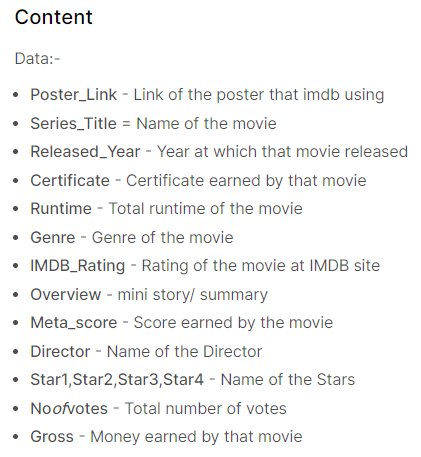

## Importação dos dados

In [7]:
df_filmes = pd.read_csv('/content/imdb_top_1000.csv', sep=',', decimal='.')
print(type(df_filmes))
df_filmes.sample(3)

<class 'pandas.core.frame.DataFrame'>


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
406,https://m.media-amazon.com/images/M/MV5BMGM4M2...,The Princess Bride,1987,U,98 min,"Adventure, Family, Fantasy",8.0,"While home sick in bed, a young boy's grandfat...",77.0,Rob Reiner,Cary Elwes,Mandy Patinkin,Robin Wright,Chris Sarandon,393899,"30,857,814"
624,https://m.media-amazon.com/images/M/MV5BMTg4OD...,Mr. Nobody,2009,R,141 min,"Drama, Fantasy, Romance",7.8,A boy stands on a station platform as a train ...,63.0,Jaco Van Dormael,Jared Leto,Sarah Polley,Diane Kruger,Linh Dan Pham,216421,"3,600"
841,https://m.media-amazon.com/images/M/MV5BNWU3MD...,Ordinary People,1980,U,124 min,Drama,7.7,The accidental death of the older son of an af...,86.0,Robert Redford,Donald Sutherland,Mary Tyler Moore,Judd Hirsch,Timothy Hutton,47099,"54,800,000"


## Filtros para o dataset

In [74]:
def str2int (gross:str)->int:
  """
    Transforms a string object into a integer value.
    Inputs:
        gross (str): string object to be converted into integer.
    Outputs:
        gross_int (int): Integer value of the gross.
  """
  try:
    gross_int = int(gross.replace(',',''))
    return(gross_int)
  except:
    return(gross)

In [75]:
%%capture

df_filmes = df_filmes[df_filmes['Released_Year'] != 'PG']
df_filmes.dropna(inplace=True)

df_filmes['Gross'] = df_filmes['Gross'].apply(lambda x: str2int(x))

In [76]:
df_filmes.sample(3)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
891,https://m.media-amazon.com/images/M/MV5BMTEzNz...,Incredibles 2,2018,UA,118 min,"Animation, Action, Adventure",7.6,The Incredibles family takes on a new mission ...,80.0,Brad Bird,Craig T. Nelson,Holly Hunter,Sarah Vowell,Huck Milner,250057,608581744
241,https://m.media-amazon.com/images/M/MV5BNzM3ND...,Kill Bill: Vol. 1,2003,R,111 min,"Action, Crime, Drama",8.1,"After awakening from a four-year coma, a forme...",69.0,Quentin Tarantino,Uma Thurman,David Carradine,Daryl Hannah,Michael Madsen,1000639,70099045
509,https://m.media-amazon.com/images/M/MV5BMGFkNj...,No Man's Land,2001,R,98 min,"Comedy, Drama, War",7.9,Bosnia and Herzegovina during 1993 at the time...,84.0,Danis Tanovic,Branko Djuric,Rene Bitorajac,Filip Sovagovic,Georges Siatidis,44618,1059830


# Comece a programar daqui!
------------------------------------

In [21]:
# Média de notas
print('Nota média: {:.2f}'.format(df_filmes['IMDB_Rating'].mean()))

Nota média: 7.95


In [20]:
# Pegar filmes entre 2005 a 2010
print(df_filmes[df_filmes['Released_Year'].between('2005','2010')])

                                          Poster_Link  ...        Gross
2   https://m.media-amazon.com/images/M/MV5BMTMxNT...  ...  534,858,444
8   https://m.media-amazon.com/images/M/MV5BMjAxMz...  ...  292,576,195
36  https://m.media-amazon.com/images/M/MV5BMjA4ND...  ...   53,089,891
37  https://m.media-amazon.com/images/M/MV5BMTI1MT...  ...  132,384,315
64  https://m.media-amazon.com/images/M/MV5BNTkyOG...  ...    6,532,908

[5 rows x 16 columns]


In [55]:
# 5 maiores filmes com maior receita
df_filmes.sort_values('Gross', ascending=False).head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
738,https://m.media-amazon.com/images/M/MV5BOTc3Nz...,Rockstar,2011,UA,159 min,"Drama, Music, Musical",7.7,Janardhan Jakhar chases his dreams of becoming...,NaN,Imtiaz Ali,Ranbir Kapoor,Nargis Fakhri,Shammi Kapoor,Kumud Mishra,39501,"985,912"
682,https://m.media-amazon.com/images/M/MV5BZDRkOW...,The Color Purple,1985,U,154 min,Drama,7.8,A black Southern woman struggles to find her i...,78.0,Steven Spielberg,Danny Glover,Whoopi Goldberg,Oprah Winfrey,Margaret Avery,78321,"98,467,863"
194,https://m.media-amazon.com/images/M/MV5BZWFhOG...,Sherlock Jr.,1924,Passed,45 min,"Action, Comedy, Romance",8.2,"A film projectionist longs to be a detective, ...",NaN,Buster Keaton,Buster Keaton,Kathryn McGuire,Joe Keaton,Erwin Connelly,41985,"977,375"
748,https://m.media-amazon.com/images/M/MV5BOGUyZD...,The Social Network,2010,UA,120 min,"Biography, Drama",7.7,As Harvard student Mark Zuckerberg creates the...,95.0,David Fincher,Jesse Eisenberg,Andrew Garfield,Justin Timberlake,Rooney Mara,624982,"96,962,694"
7,https://m.media-amazon.com/images/M/MV5BNDE4OT...,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"


In [77]:
# maiores diretores
# df_grouped = df_filmes.groupby('Director', as_index=False)
# df_grouped.sort_values('Gross', ascending= False).head(3)

df_grouped = df_filmes.groupby('Director', as_index=False).agg({
    'Gross': 'mean'
})

df_grouped.head()

,Director,Gross
0,Abdellatif Kechiche,2199675.0
1,Abhishek Kapoor,1122527.0
2,Adam McKay,70259870.0
3,Akira Kurosawa,2202405.5
4,Alan J. Pakula,70600000.0


In [78]:
df_grouped.sort_values('Gross', ascending=False).head(3)

,Director,Gross
24,Anthony Russo,5.512599e+08
108,Gareth Edwards,5.321773e+08
141,J.J. Abrams,4.743903e+08
